In [1]:
using Pkg
Pkg.add("Tables")
Pkg.add("DataFrames")
Pkg.add("CSV")
Pkg.add("Plots")
Pkg.add("CategoricalArrays")
Pkg.add("MLJ")
Pkg.add("CatBoost")

using Tables,DataFrames,CSV,Plots,CategoricalArrays,Statistics,MLJ

   Resolving package versions...
  No Changes to `C:\Users\Ono Shuya\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\Ono Shuya\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Ono Shuya\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\Ono Shuya\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Ono Shuya\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\Ono Shuya\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Ono Shuya\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\Ono Shuya\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Ono Shuya\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\Ono Shuya\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Ono Shuya\.

<header>
  <h1>-- basic tutorial --</h1>

In [2]:
a=Int64[1,2,3]
println(maximum(a))
println(minimum(a))
println(sum(a))

3
1
6


In [3]:
total=0
for i=0:10
    total+=i
    println(total)
end

0
1
3
6
10
15
21
28
36
45
55


In [4]:
x=3
y=7
if x<y
    print("y is bigger than x")
else
    print("x is bigger than y")
end

y is bigger than x

In [5]:
test(x,y)=println(x<y ? "y is bigger than x" : x>y ? "x is bigger than y" : "x is equal to y")

test(1,1)
test(1,2)
test(3,1)

x is equal to y
y is bigger than x
x is bigger than y


In [6]:
tuple(1,2)
Dict([(:name,:age),("Hiro",12)])
Dict(:name=>"Taro", :age=>15)

Dict{Symbol, Any} with 2 entries:
  :age  => 15
  :name => "Taro"

In [7]:
df=DataFrame(name=["Julia","Anna","Bob","Mike"],age=[10,5,18,21])

Row,name,age
,String,Int64
1,Julia,10
2,Anna,5
3,Bob,18
4,Mike,21


In [8]:
sub=df[1:3, :age]
names=df.name
older=df[df.age.>15,:]

Row,name,age
,String,Int64
1,Bob,18
2,Mike,21


In [9]:
sort(df,"age",rev=false)

Row,name,age
,String,Int64
1,Anna,5
2,Julia,10
3,Bob,18
4,Mike,21


In [10]:
df.sex=["female","female","male","male"]
df

Row,name,age,sex
,String,Int64,String
1,Julia,10,female
2,Anna,5,female
3,Bob,18,male
4,Mike,21,male


In [11]:
df[(df.age.>8).&(df.sex.=="female"),:]

Row,name,age,sex
,String,Int64,String
1,Julia,10,female


In [12]:
df[(df.age.>8).&(df.sex.=="female"),"age"].=12
df

Row,name,age,sex
,String,Int64,String
1,Julia,12,female
2,Anna,5,female
3,Bob,18,male
4,Mike,21,male


In [13]:
df2=DataFrame(
            name=["Hanako"],
            age=[15],
            sex=["female"])

Row,name,age,sex
,String,Int64,String
1,Hanako,15,female


In [14]:
df=append!(df,df2)

Row,name,age,sex
,String,Int64,String
1,Julia,12,female
2,Anna,5,female
3,Bob,18,male
4,Mike,21,male
5,Hanako,15,female


In [15]:
new_df=select(df,Not("name"))

Row,age,sex
,Int64,String
1,12,female
2,5,female
3,18,male
4,21,male
5,15,female


In [16]:
group_df=groupby(df, :sex)
sex_count=combine(group_df,nrow=> :count)

Row,sex,count
,String,Int64
1,female,3
2,male,2


In [17]:
age_mean=combine(group_df,"age"=>mean)

Row,sex,age_mean
,String,Float64
1,female,10.6667
2,male,19.5


In [18]:
df=leftjoin(df,sex_count,on=:sex)
df=leftjoin(df,age_mean,on=:sex)

Row,name,age,sex,count,age_mean
,String,Int64,String,Int64?,Float64?
1,Julia,12,female,3,10.6667
2,Anna,5,female,3,10.6667
3,Bob,18,male,2,19.5
4,Mike,21,male,2,19.5
5,Hanako,15,female,3,10.6667


In [19]:
select(df,:sex, :age=>sum)

Row,sex,age_sum
,String,Int64
1,female,71
2,female,71
3,male,71
4,male,71
5,female,71


In [20]:
select(df, :sex , :age=>sum, :age=>mean, :age=>std)

Row,sex,age_sum,age_mean,age_std
,String,Int64,Float64,Float64
1,female,71,14.2,6.14003
2,female,71,14.2,6.14003
3,male,71,14.2,6.14003
4,male,71,14.2,6.14003
5,female,71,14.2,6.14003


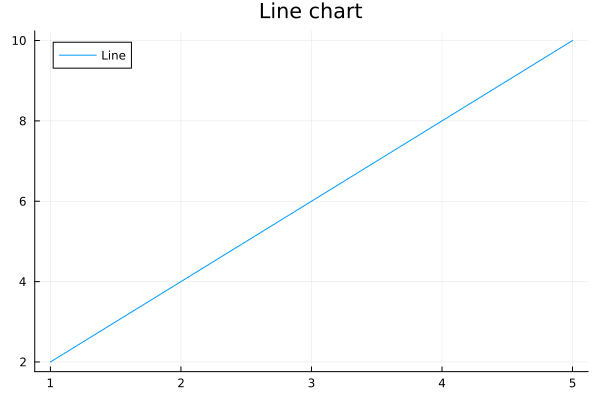

In [21]:
plot([1,2,3,4,5],[2,4,6,8,10],title="Line chart",label="Line")

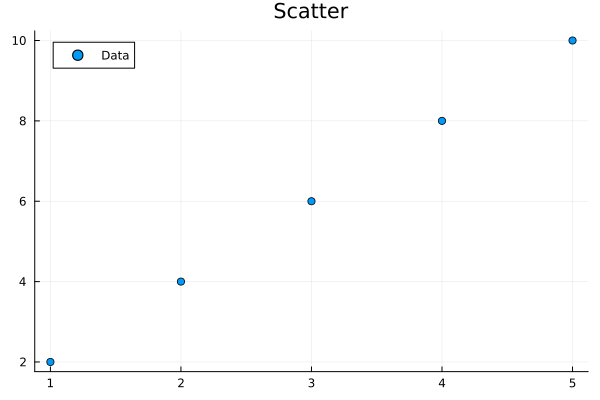

In [22]:
plot([1,2,3,4,5],[2,4,6,8,10],title="Scatter",label="Data",seriestype="scatter")

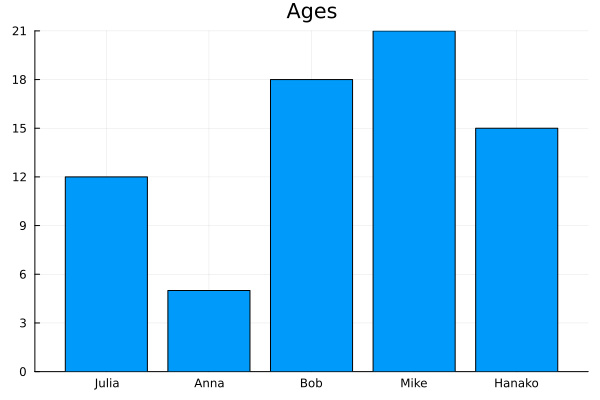

In [23]:
plot(df.name,df.age,title="Ages",label=nothing,seriestype="bar")

<header>
  <h1>-- titanic dataset tutorial --</h1>

In [24]:
#read dataset
df=CSV.read("C:\\Users\\Ono Shuya\\OneDrive\\デスクトップ\\test data\\train.csv", DataFrame)
print(size(df))
first(df,5)

(891, 12)

Row,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,Int64,Int64,Int64,String,String7,Float64?,Int64,Int64,String31,Float64,String15?,String1?
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,missing,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,missing,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,missing,S


In [25]:
#preprocess 
function preprocessing(df)
    temp=deepcopy(df)
    
    select!(temp,Not(:PassengerId))
    select!(temp,Not(:Name))
    select!(temp,Not(:Ticket))
    
    recode!(temp[!, :Sex], "male" => "0", "female" => "1")
    temp.Sex=parse.(Int64, temp.Sex)
    recode!(temp[!, :Embarked], "S" => "0", "C" => "1", "Q" => "2",missing => "3" )
    temp.Embarked=parse.(Int64, temp.Embarked)
    
    recode!(temp[!, :Age],missing => mean(skipmissing(temp[!, :Age])))
    recode!(temp[!, :Fare], missing => 0.0)
    
    return temp
    
end

data=preprocessing(df)

Row,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
,Int64,Int64,Int64,Float64?,Int64,Int64,Float64,String15?,Int64
1,0,3,0,22.0,1,0,7.25,missing,0
2,1,1,1,38.0,1,0,71.2833,C85,1
3,1,3,1,26.0,0,0,7.925,missing,0
4,1,1,1,35.0,1,0,53.1,C123,0
5,0,3,0,35.0,0,0,8.05,missing,0
6,0,3,0,29.6991,0,0,8.4583,missing,2
7,0,1,0,54.0,0,0,51.8625,E46,0
8,0,3,0,2.0,3,1,21.075,missing,0
9,1,3,1,27.0,0,2,11.1333,missing,0


In [26]:
#train test split
train_data, test_data=partition(data, 0.8, shuffle=true, rng=123)
train_y, train_x=unpack(train_data, ==(:Survived), !=(:Cabin))
test_y, test_x=unpack(test_data, ==(:Survived), !=(:Cabin))
println("train_x: ",size(train_x)," train_y: ",size(train_y))
println("test_x: ",size(test_x)," test_y: ",size(test_y))

train_x: (713, 7) train_y: (713,)
test_x: (178, 7) test_y: (178,)


In [27]:
#search model from MLJ
models("boost")

11-element Vector{NamedTuple{(:name, :package_name, :is_supervised, :abstract_type, :deep_properties, :docstring, :fit_data_scitype, :human_name, :hyperparameter_ranges, :hyperparameter_types, :hyperparameters, :implemented_methods, :inverse_transform_scitype, :is_pure_julia, :is_wrapper, :iteration_parameter, :load_path, :package_license, :package_url, :package_uuid, :predict_scitype, :prediction_type, :reporting_operations, :reports_feature_importances, :supports_class_weights, :supports_online, :supports_training_losses, :supports_weights, :transform_scitype, :input_scitype, :target_scitype, :output_scitype)}}:
 (name = AdaBoostClassifier, package_name = MLJScikitLearnInterface, ... )
 (name = AdaBoostStumpClassifier, package_name = DecisionTree, ... )
 (name = CatBoostClassifier, package_name = CatBoost, ... )
 (name = CatBoostRegressor, package_name = CatBoost, ... )
 (name = GradientBoostingClassifier, package_name = MLJScikitLearnInterface, ... )
 (name = GradientBoostingRegress

In [28]:
#load model from MLJ
Cat=@load CatBoostClassifier pkg=CatBoost
cat=Cat(iterations=1000)

import CatBoost

[ Info: For silent loading, specify `verbosity=0`. 


 ✔


CatBoostClassifier(
  iterations = 1000, 
  learning_rate = 0.03, 
  depth = 6, 
  l2_leaf_reg = 3.0, 
  model_size_reg = 0.5, 
  rsm = 1.0, 
  loss_function = nothing, 
  border_count = nothing, 
  feature_border_type = nothing, 
  per_float_feature_quantization = nothing, 
  input_borders = nothing, 
  output_borders = nothing, 
  fold_permutation_block = 1, 
  nan_mode = "Min", 
  counter_calc_method = "SkipTest", 
  leaf_estimation_iterations = nothing, 
  leaf_estimation_method = nothing, 
  thread_count = -1, 
  random_seed = nothing, 
  metric_period = 1, 
  ctr_leaf_count_limit = nothing, 
  store_all_simple_ctr = false, 
  max_ctr_complexity = nothing, 
  has_time = false, 
  allow_const_label = false, 
  target_border = nothing, 
  class_weights = nothing, 
  auto_class_weights = nothing, 
  one_hot_max_size = nothing, 
  random_strength = 1.0, 
  bagging_temperature = 1.0, 
  fold_len_multiplier = 2.0, 
  used_ram_limit = nothing, 
  gpu_ram_part = 0.95, 
  pinned_memory_siz

In [29]:
#define and train model
model=machine(cat, train_x, train_y)
fit!(model, verbosity=2)

┌ Warning: The number and/or types of data arguments do not match what the specified model
│ supports. Suppress this type check by specifying `scitype_check_level=0`.
│ 
│ Run `@doc CatBoost.CatBoostClassifier` to learn more about your model's requirements.
│ 
│ Commonly, but non exclusively, supervised models are constructed using the syntax
│ `machine(model, X, y)` or `machine(model, X, y, w)` while most other models are
│ constructed with `machine(model, X)`.  Here `X` are features, `y` a target, and `w`
│ sample or class weights.
│ 
│ In general, data in `machine(model, data...)` is expected to satisfy
│ 
│     scitype(data) <: MLJ.fit_data_scitype(model)
│ 
│ In the present case:
│ 
│ scitype(data) = Tuple{Table{Union{AbstractVector{Union{Missing, Continuous}}, AbstractVector{Continuous}, AbstractVector{Count}}}, AbstractVector{Count}}
│ 
│ fit_data_scitype(model) = Tuple{Union{Table{<:Union{AbstractVector{<:Continuous}, AbstractVector{<:Count}, AbstractVector{<:OrderedFactor}, Ab

0:	learn: 0.6727148	total: 166ms	remaining: 2m 45s
1:	learn: 0.6543259	total: 176ms	remaining: 1m 27s
2:	learn: 0.6384954	total: 187ms	remaining: 1m 2s
3:	learn: 0.6245270	total: 197ms	remaining: 49s
4:	learn: 0.6161801	total: 203ms	remaining: 40.3s
5:	learn: 0.6042812	total: 213ms	remaining: 35.3s
6:	learn: 0.5914265	total: 225ms	remaining: 31.9s
7:	learn: 0.5803414	total: 234ms	remaining: 29.1s
8:	learn: 0.5716140	total: 242ms	remaining: 26.6s
9:	learn: 0.5625441	total: 255ms	remaining: 25.2s
10:	learn: 0.5523159	total: 273ms	remaining: 24.5s
11:	learn: 0.5449356	total: 285ms	remaining: 23.5s
12:	learn: 0.5360594	total: 303ms	remaining: 23s
13:	learn: 0.5277144	total: 319ms	remaining: 22.4s
14:	learn: 0.5184302	total: 340ms	remaining: 22.4s
15:	learn: 0.5148223	total: 350ms	remaining: 21.5s
16:	learn: 0.5082064	total: 369ms	remaining: 21.3s
17:	learn: 0.5029757	total: 379ms	remaining: 20.7s
18:	learn: 0.4970069	total: 394ms	remaining: 20.3s
19:	learn: 0.4897316	total: 409ms	remaining

trained Machine; caches model-specific representations of data
  model: CatBoostClassifier(iterations = 1000, …)
  args: 
    1:	Source @884 ⏎ Table{Union{AbstractVector{Union{Missing, Continuous}}, AbstractVector{Continuous}, AbstractVector{Count}}}
    2:	Source @012 ⏎ AbstractVector{Count}


In [30]:
#prediction and evaluation
preds=predict_mode(model, test_x)
accuracy(preds,test_y)

0.8202247191011236